In [250]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import operator
from random import seed
from random import randrange
%matplotlib inline

In [251]:
dat = pd.read_csv('data.csv', header = None)
trainset = dat.iloc[1:,:].as_matrix()
trainset.astype(float)
test = [[3,2]]
test=np.array(test)
trainset_copy=trainset
trainset_copy=np.array(trainset_copy)

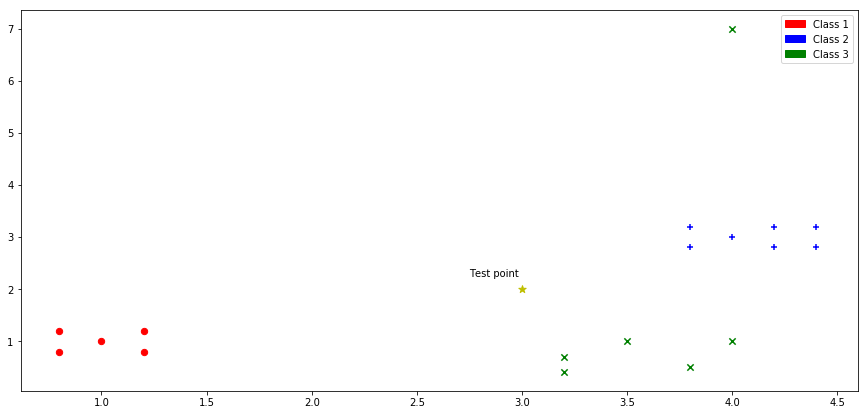

In [252]:
df = pd.read_csv('data.csv')
data = df.astype(float).values.tolist()
plt.figure(num=1,figsize=(15, 7))
for i in data:
    if(i[2] == 1):
        plt.scatter(i[0],i[1],s=40,c='r',marker='o')
    elif(i[2] == 2):
        plt.scatter(i[0],i[1],s=40,c='b',marker='+')
    else:
        plt.scatter(i[0],i[1],s=40,c='g',marker='x')
    
red_patch = mpatches.Patch(color='red', label='Class 1')
blue_patch = mpatches.Patch(color='blue', label='Class 2')
green_patch = mpatches.Patch(color='green', label='Class 3')
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.scatter(3,2, s = 60, c = 'y', marker = '*')
plt.text(2.75,2.25, r'Test point')
plt.show()

In [253]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [254]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [255]:
def cross_validation_split(dataset, folds=3):
    dataset_split = list()
    dataset_copy =list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [256]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [257]:
total_accuracy=list()
def test_accuracy(trainset,iterations,k):
    for j in range(iterations):
        split_data = cross_validation_split(trainset)
        split_data = np.array(split_data, dtype=np.float)
        a = split_data[0]
        b = split_data[1]
        c = split_data[2]
        new_train=np.concatenate((a,b))
        ans=list()
        for i in range(0,len(c)):
            neigh = getNeighbors(new_train,c[i],k)
            cl=getResponse(neigh)            
            if(cl==c[i][2]):
                   ans.append(1)
            else:
                ans.append(0)
        c1=0
        for i in range(len(ans)):
            if(ans[i]==1):
                c1+=1    
        total_accuracy.append((c1/len(ans))*100) 
        print("Iterations",j+1," accuracy :",((c1/len(ans))*100))
    s=0
    for i in range(len(total_accuracy)):
        s=s+total_accuracy[i]
    average = s/len(total_accuracy)
    print("--------------------Average accuracy for k =",k," : ",average,"--------------")

In [258]:
for k in range(1,6,2):
    iterations = 10
    print("for k = ",k)
    test_accuracy(trainset,iterations,k)

for k =  1
Iterations 1  accuracy : 83.33333333333334
Iterations 2  accuracy : 100.0
Iterations 3  accuracy : 100.0
Iterations 4  accuracy : 100.0
Iterations 5  accuracy : 100.0
Iterations 6  accuracy : 100.0
Iterations 7  accuracy : 100.0
Iterations 8  accuracy : 100.0
Iterations 9  accuracy : 83.33333333333334
Iterations 10  accuracy : 83.33333333333334
--------------------Average accuracy for k = 1  :  95.00000000000001 --------------
for k =  3
Iterations 1  accuracy : 100.0
Iterations 2  accuracy : 100.0
Iterations 3  accuracy : 100.0
Iterations 4  accuracy : 100.0
Iterations 5  accuracy : 83.33333333333334
Iterations 6  accuracy : 100.0
Iterations 7  accuracy : 83.33333333333334
Iterations 8  accuracy : 100.0
Iterations 9  accuracy : 100.0
Iterations 10  accuracy : 100.0
--------------------Average accuracy for k = 3  :  95.83333333333333 --------------
for k =  5
Iterations 1  accuracy : 66.66666666666666
Iterations 2  accuracy : 50.0
Iterations 3  accuracy : 100.0
Iterations 4 

In [259]:
testInstance = [3,2]
for k in range(1,6,2):
    neighbors = getNeighbors(data, testInstance, k)
    cl =getResponse(neighbors)
    print("For k = ",k,"class = ",cl)

For k =  1 class =  3.0
For k =  3 class =  3.0
For k =  5 class =  3.0
